<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчета-recovery" data-toc-modified-id="Проверка-расчета-recovery-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка расчета recovery</a></span></li><li><span><a href="#Анализ-недоступных-в-тестовой-выборке-признаков" data-toc-modified-id="Анализ-недоступных-в-тестовой-выборке-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ недоступных в тестовой выборке признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Вывод-по-подготовке-данных" data-toc-modified-id="Вывод-по-подготовке-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод по подготовке данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрации-металлов-на-разных-стадиях-очистки" data-toc-modified-id="Концентрации-металлов-на-разных-стадиях-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрации металлов на разных стадиях очистки</a></span></li><li><span><a href="#Размеры-гранул-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Размеры-гранул-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Размеры гранул на обучающей и тестовой выборках</a></span></li><li><span><a href="#Изменение-суммарной-концентрации-на-разных-этапах-очистки" data-toc-modified-id="Изменение-суммарной-концентрации-на-разных-этапах-очистки-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение суммарной концентрации на разных этапах очистки</a></span></li><li><span><a href="#Выводы-по-анализу-данных" data-toc-modified-id="Выводы-по-анализу-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Выводы по анализу данных</a></span></li></ul></li><li><span><a href="#Построение-моделей" data-toc-modified-id="Построение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Построение моделей</a></span><ul class="toc-item"><li><span><a href="#Выделение-признаков" data-toc-modified-id="Выделение-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выделение признаков</a></span></li><li><span><a href="#Создание-оценщика" data-toc-modified-id="Создание-оценщика-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание оценщика</a></span></li><li><span><a href="#Инициализация-GridSearchCV" data-toc-modified-id="Инициализация-GridSearchCV-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Инициализация GridSearchCV</a></span><ul class="toc-item"><li><span><a href="#Pipeline-и-гиперпараметры" data-toc-modified-id="Pipeline-и-гиперпараметры-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Pipeline и гиперпараметры</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Выбор-модели" data-toc-modified-id="Выбор-модели-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Выбор модели</a></span></li></ul></li><li><span><a href="#Сравнение-с-DummyRegressor" data-toc-modified-id="Сравнение-с-DummyRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Сравнение с DummyRegressor</a></span></li><li><span><a href="#Вывод-по-моделям" data-toc-modified-id="Вывод-по-моделям-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод по моделям</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В наличии данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

## Подготовка данных

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import  make_pipeline
from sklearn.dummy import DummyRegressor
from matplotlib import rcParams 

import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('gold_industry_train.csv')
test = pd.read_csv('gold_industry_test.csv')
full = pd.read_csv('gold_industry_full.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

Имеем два набора данных с большим количеством столбцов - 86 в обучающем наборе и 52 в тренировочном, с этим уже нужно будет что-то делать. Присутствует относительно небольшое количество пропусков.

### Проверка расчета recovery

Проверим правильность расчета параметра recovery.

In [5]:
def recovery_check(recovery, feed_au, concentrate_au, tail_au):
     return (concentrate_au * (feed_au - tail_au)) / (feed_au * (concentrate_au - tail_au)) * 100

In [6]:
train['recovery_calk'] = train[['rougher.output.recovery',
                                'rougher.input.feed_au', 
                                'rougher.output.concentrate_au', 
                                'rougher.output.tail_au']].apply(lambda x: recovery_check(*x), axis=1)


mean_absolute_error(train['rougher.output.recovery'], train['recovery_calk'])

9.83758577644259e-15

Да, параметр определенно рассчитан верно, избавимся от добавленного столбца.

In [7]:
train = train.drop('recovery_calk', axis=1)

### Анализ недоступных в тестовой выборке признаков

In [8]:
unavailable_columns = []

for column in train.columns:
    if column not in test.columns:
        unavailable_columns.append(column)
        
unavailable_columns

['rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_au',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_ag',
 'secondary_cleaner.output.tail_pb',
 'secondary_cleaner.output.tail_sol',
 'final.output.concentrate_au',
 'final.output.concentrate_ag',
 'final

Все представленные выше столбцы можно объединить в несколько групп - результаты флотации, результаты первичной и вторичной очистки и финал, понятно, что эти данные нельзя получить сразу, то есть для первичного анализа они недоступны, а значит и для нас бесполезны. Удалим эти столбцы из обучающей выборки, но несколько позже.

### Предобработка данных

Обработаем пропуски, сразу было понятно, что они есть, сейчас посмотрим точнее.

In [9]:
train.isna().sum()

date                       0
rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb     72
rougher.input.feed_sol    77
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       1
final.output.tail_pb      75
final.output.tail_sol      5
Length: 87, dtype: int64

Да, таблицу подрезало, печально, но мы помним, что их там было немного, обработаем пропуски методом k-ближайших соседей.

In [10]:
imputer = KNNImputer() 
imputer.fit(train.drop(['date'], axis=1))
columns = train.drop(['date'], axis=1).columns 
train[columns] = imputer.transform(train[columns])

In [11]:
train.isna().sum()

date                      0
rougher.input.feed_au     0
rougher.input.feed_ag     0
rougher.input.feed_pb     0
rougher.input.feed_sol    0
                         ..
final.output.recovery     0
final.output.tail_au      0
final.output.tail_ag      0
final.output.tail_pb      0
final.output.tail_sol     0
Length: 87, dtype: int64

Отлично, аналогично делаем и с тестовой выборкой.

In [12]:
imputer = KNNImputer() 
imputer.fit(test.drop(['date'], axis=1))
columns = test.drop(['date'], axis=1).columns 
test[columns] = imputer.transform(test[columns])

In [13]:
test.isna().sum()

date                                          0
rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_b_level             0
rougher.state.floatbank10_c_air               0
rougher.state.floatbank10_c_level             0
rougher.state.floatbank10_d_air               0
rougher.state.floatbank10_d_level             0
rougher.state.floatbank10_e_air               0
rougher.state.floatbank10_e_level             0
rougher.state.floatbank10_f_air               0
rougher.state.floatbank10_f_level       

### Вывод по подготовке данных

Итак, в нашем распоряжении три набора данных, тренировочный, тестовый и общий. Следует отметить, что количество столбцов в тренировочном и тестовом наборах данных отличается, поскольку некоторые данные не доступны на том этапе, когда модель должна будет использоваться, поэтому было принято решение удалить лишние столбцы, сделаем мы это, однако на последнем этапе, когда будем выделять признаки. В тренировочном и тестовом мы обнаружили пропуски и убрали их метом k-Nearest Neighbors.

## Анализ данных

### Концентрации металлов на разных стадиях очистки

In [14]:
print("До флотации")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
                            format(full["rougher.input.feed_ag"].mean(),
                            full["rougher.input.feed_pb"].mean(),
                            full["rougher.input.feed_au"].mean()))

print()
print("После флотации")
print("Коцентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
                           format(full["rougher.output.concentrate_ag"].mean(),
                           full["rougher.output.concentrate_pb"].mean(),
                           full["rougher.output.concentrate_au"].mean()))

print()
print("После первичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
                           format(full["primary_cleaner.output.concentrate_ag"].mean(),
                           full["primary_cleaner.output.concentrate_pb"].mean(),
                           full["primary_cleaner.output.concentrate_au"].mean()))


print()
print("После вторичной очистки")
print("Концентрация Серебра:{: 0.2f},Свинца:{: 0.2f},Золота:{: 0.2f}".
                           format(full["final.output.concentrate_ag"].mean(),
                           full["final.output.concentrate_pb"].mean(),
                           full["final.output.concentrate_au"].mean()))

До флотации
Концентрация Серебра: 8.79,Свинца: 3.60,Золота: 8.27

После флотации
Коцентрация Серебра: 11.99,Свинца: 7.61,Золота: 19.77

После первичной очистки
Концентрация Серебра: 8.44,Свинца: 9.83,Золота: 32.12

После вторичной очистки
Концентрация Серебра: 5.17,Свинца: 9.98,Золота: 44.08


Ожидаемо, концентрация золота резко растет, для этого, собственно, все и затевалось, концентрация свинца тоже несколько выросла, а вот серебра снизилась.

### Размеры гранул на обучающей и тестовой выборках

Посмотрим размер гранул, нам бы очень не хотелось, чтобы их распределение сильно отличалось - это поставит под сомнение будущие результаты моделей. Помним, что размер выборок отличается, поэтому нормализируем.

<Axes: xlabel='rougher.input.feed_size', ylabel='Probability'>

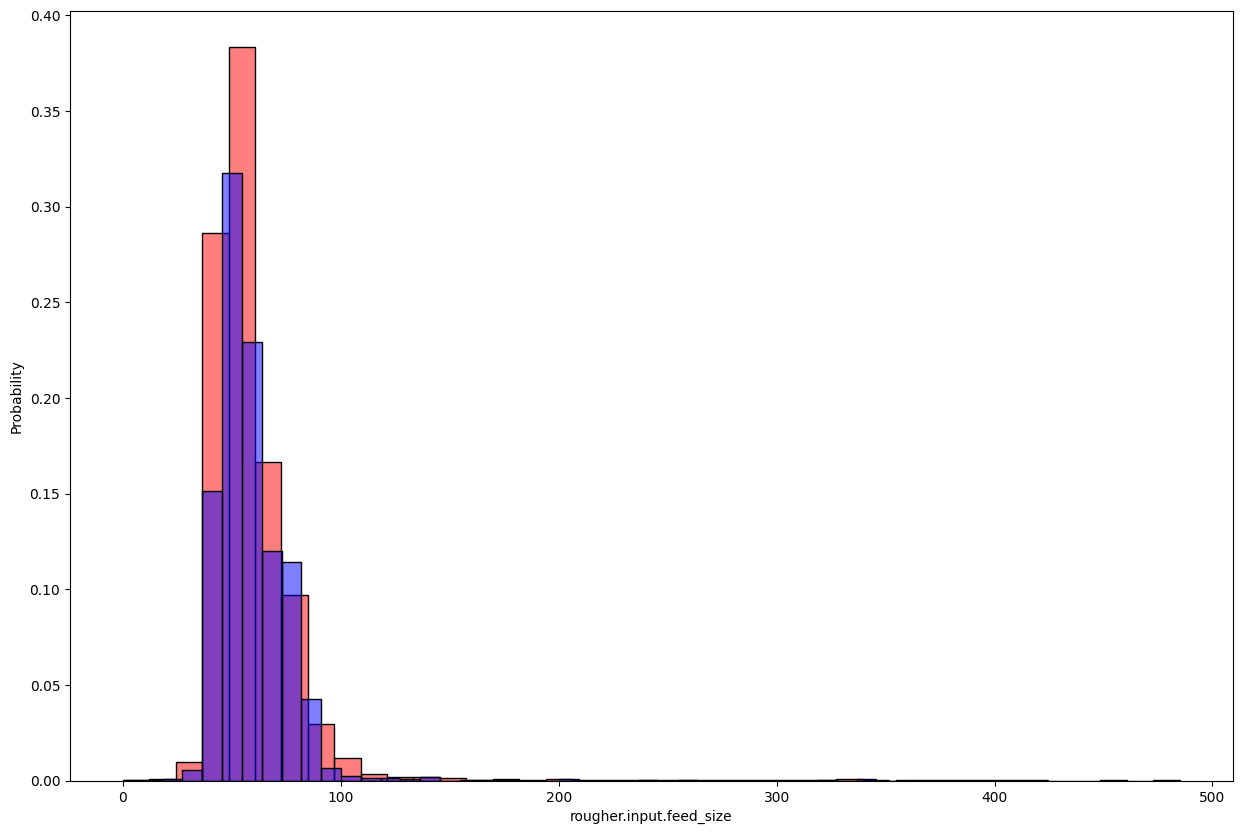

In [15]:
rcParams['figure.figsize'] = 15,10
sns.histplot(train['rougher.input.feed_size'], bins=40, color='red', alpha  = 0.5, stat='probability')
sns.histplot(test['rougher.input.feed_size'], bins=40, color='blue', alpha  = 0.5, stat='probability')  

Отлично, распределения отличаются не слишком сильно, можно работать.

### Изменение суммарной концентрации на разных этапах очистки

Посмотрим как менялось распределение на разных этапах очистки, и есть ли там какие-то аномалии.

In [16]:
full['concentration_input'] = (full['rougher.input.feed_ag'] + full['rougher.input.feed_pb'] +\
                               full['rougher.input.feed_au'] + full['rougher.input.feed_sol'] )

In [17]:
full['concentration_after_rougher'] = (full['rougher.output.concentrate_ag'] + full['rougher.output.concentrate_pb'] + \
                                       full['rougher.output.concentrate_au'] + full['rougher.output.concentrate_sol'])

In [18]:
full['concentration_after_primary_cleaner'] = (full['primary_cleaner.output.concentrate_ag'] + \
                                                full['primary_cleaner.output.concentrate_pb'] + \
                                                full['primary_cleaner.output.concentrate_au'] + \
                                                full['primary_cleaner.output.concentrate_sol'])


In [19]:
full['final_concentration'] = (full['final.output.concentrate_ag'] + \
                                full['final.output.concentrate_pb'] + \
                                full['final.output.concentrate_au'] + \
                                full['final.output.concentrate_sol'])

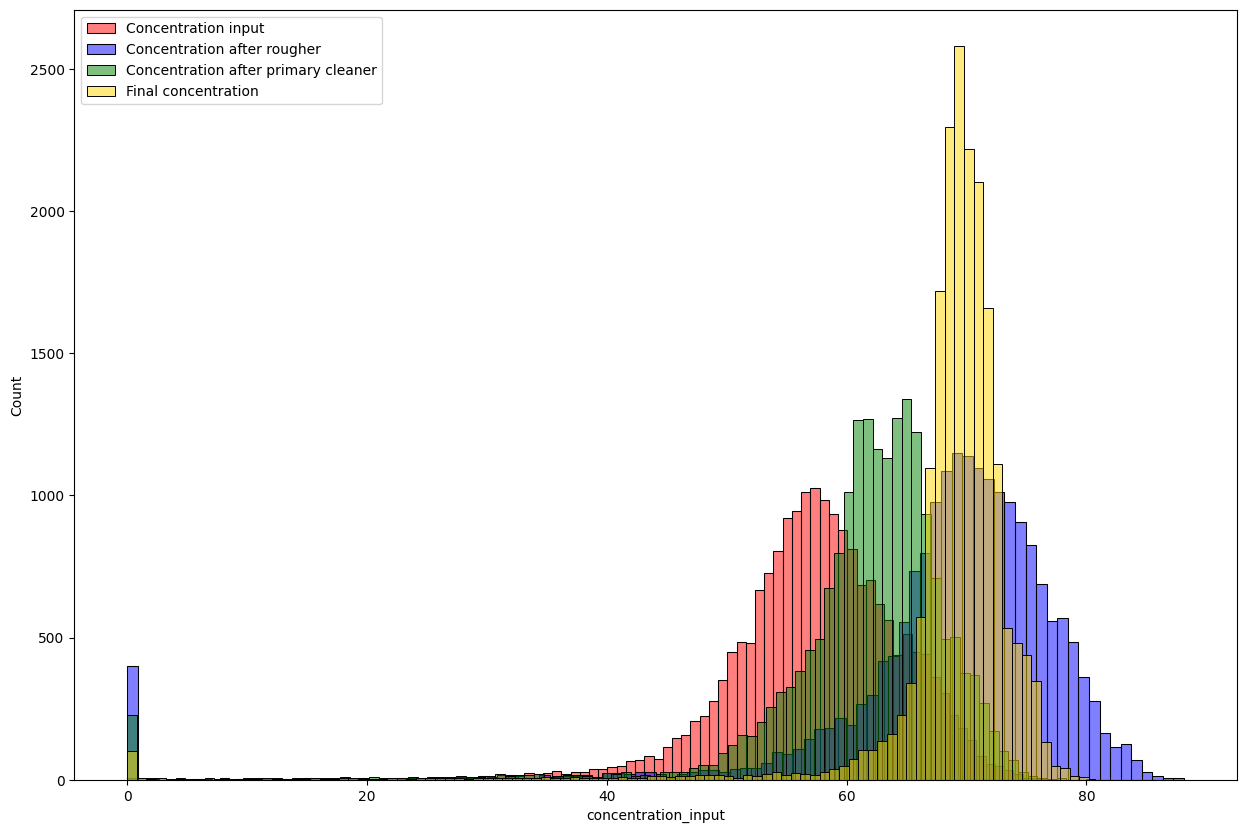

In [20]:
rcParams['figure.figsize'] = 15,10
sns.histplot(full['concentration_input'], bins=100, color='red', alpha  = 0.5)
sns.histplot(full['concentration_after_rougher'], bins=100, color='blue', alpha  = 0.5)  
sns.histplot(full['concentration_after_primary_cleaner'], bins=100, color='green', alpha  = 0.5)
sns.histplot(full['final_concentration'], bins=100, color='gold', alpha  = 0.5) 
plt.legend(labels=["Concentration input","Concentration after rougher", 
                   'Concentration after primary cleaner', 
                   'Final concentration'])

Имеем ярко выраженный выброс возле нуля, при этом нулей там в принципе быть не может, выглядит это как ошибка датчиков. Уберем эти сомнительные строки из обучающей и тестовой выборки.

In [21]:
def delete_zeros(data):
    data['concentration_input'] = (data['rougher.input.feed_ag'] + data['rougher.input.feed_pb'] +\
                                   data['rougher.input.feed_au'] + data['rougher.input.feed_sol'] )
    
    data['concentration_after_rougher'] = (data['rougher.output.concentrate_ag'] + data['rougher.output.concentrate_pb'] + \
                                          data['rougher.output.concentrate_au'] + data['rougher.output.concentrate_sol'])
    
    data['concentration_after_primary_cleaner'] = (data['primary_cleaner.output.concentrate_ag'] + \
                                                   data['primary_cleaner.output.concentrate_pb'] + \
                                                   data['primary_cleaner.output.concentrate_au'] + \
                                                   data['primary_cleaner.output.concentrate_sol']) 
    
    data['final_concentration'] = (data['final.output.concentrate_ag'] + \
                                   data['final.output.concentrate_pb'] + \
                                   data['final.output.concentrate_au'] + \
                                   data['final.output.concentrate_sol'])
    
    
    data = data.query('concentration_input > 1 and\
                       concentration_after_rougher > 1 and\
                       concentration_after_primary_cleaner > 1 and\
                       final_concentration > 1') 
    
    
    rcParams['figure.figsize'] = 15,10
    sns.histplot(data['concentration_input'], bins=100, color='red', alpha  = 0.5)
    sns.histplot(data['concentration_after_rougher'], bins=100, color='blue', alpha  = 0.5)  
    sns.histplot(data['concentration_after_primary_cleaner'], bins=100, color='green', alpha  = 0.5)
    sns.histplot(data['final_concentration'], bins=100, color='gold', alpha  = 0.5) 
    plt.legend(labels=["Concentration input","Concentration after rougher", 
                       'Concentration after primary cleaner', 
                       'Final concentration'])
    
    
    
    data = data.drop(['concentration_input', 
                      'concentration_after_rougher', 
                      'concentration_after_primary_cleaner', 
                      'final_concentration'], axis=1) 
    return data
    

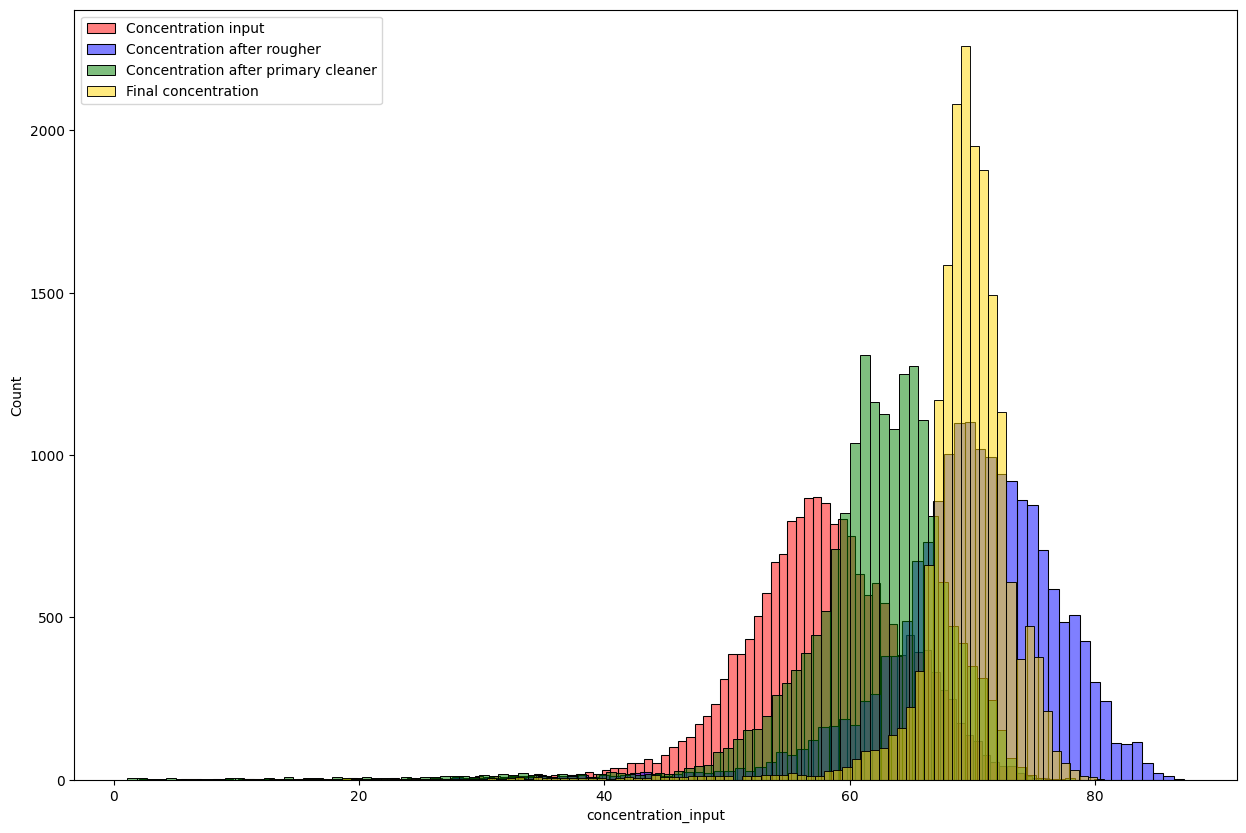

In [22]:
full = delete_zeros(full)

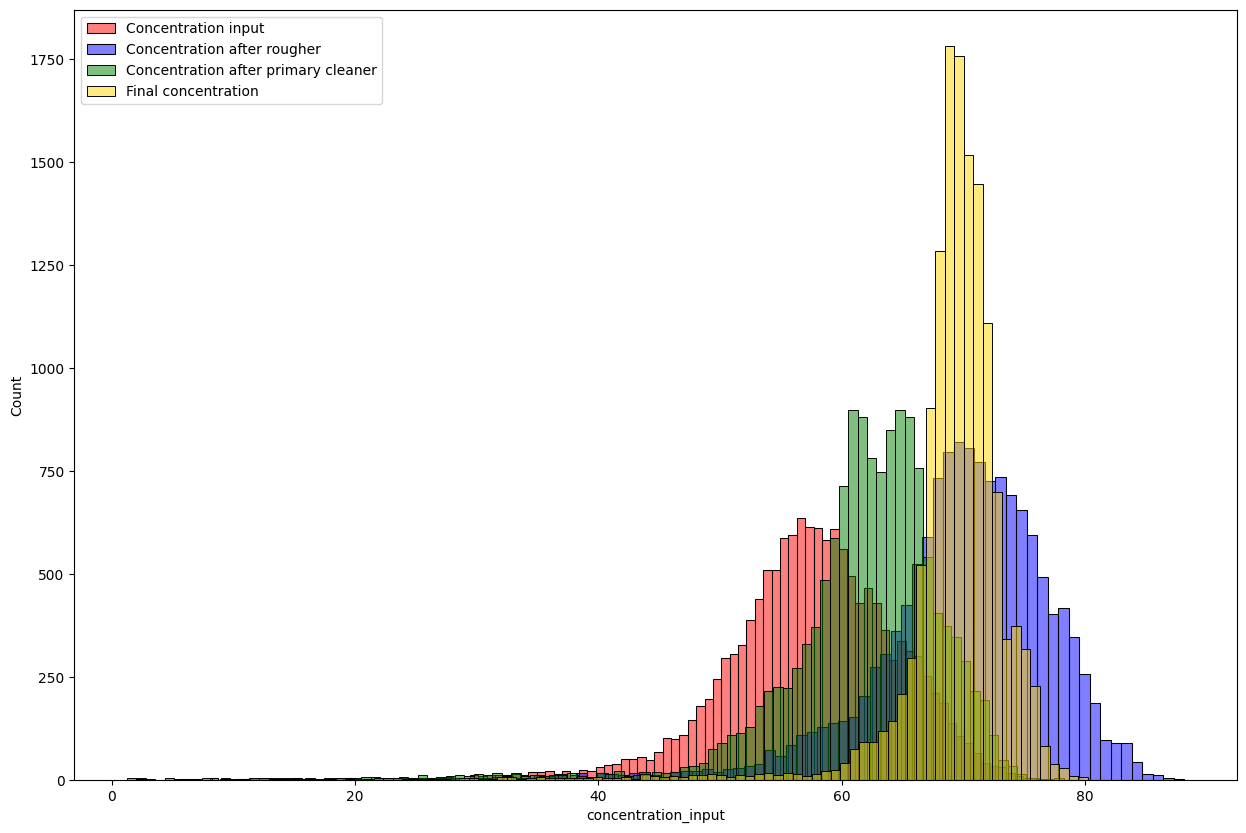

In [23]:
train = delete_zeros(train)

In [24]:
test = test.loc[test['date'].isin(full['date'])]

### Выводы по анализу данных

В рамках анализа данных можно подчеркнуть следующие моменты:
- Как и ожидалось, концентрация золота с течением процесса растет сильнее всего, при этом, неслько выросла и концентрация свинца, но снизилиась серебра.
- Распределение размеров гранул в обучающей и тестовой выборке сопоставимо, что позволяет работать дальше в этом направлении. 
- В суммарной концентрации веществ обнаружились аномалии около нуля, строки с ними удалены из тренировочной и тестовой выборок.

## Построение моделей

### Выделение признаков

Выбелим необходимые нам признаки для обучения, кроме того, удалим те самые "лишние" столбцы из тренировочной выборки.

In [25]:
target_train_rougher = train['rougher.output.recovery']
target_train_final = train['final.output.recovery']

In [26]:
features_train = train.drop(unavailable_columns, axis=1).drop('date', axis=1)

In [27]:
target_test_rougher = full.loc[full['date'].isin(test['date'])]['rougher.output.recovery']
target_test_final = full.loc[full['date'].isin(test['date'])]['final.output.recovery']

In [28]:
features_test = test.drop('date', axis=1)

Проверим соответветсвие размерности выборок.

In [29]:
print(target_train_rougher.shape)
print(target_train_final.shape)
print()
print(features_train.shape)
print()
print(target_test_rougher.shape)
print(target_test_final.shape)
print()
print(features_test.shape)

(13883,)
(13883,)

(13883, 52)

(4669,)
(4669,)

(4669, 52)


Отлично.

### Создание оценщика

Создадим оценщик и функцию подсчета финальной метрики.

In [30]:
def sMAPE(y_true, y_pred):
    
    error = np.mean(abs(y_true - y_pred)/((abs(y_true) + abs(y_pred)) / 2)) * 100
    

    return abs(error)

In [31]:
def final_sMAPE(sMAPE_rougher, sMAPE_final):
    
    return (0.25 * sMAPE_rougher + 0.75 * sMAPE_final)

In [32]:
sMAPE_score = make_scorer(sMAPE, greater_is_better=False)

### Инициализация GridSearchCV

#### Pipeline и гиперпараметры

К сожалению, в данном случае некорректно изменять скейлером всю обучающую выборку, так как при кросс-валидации это приведет к утечке данных, поэтому воспользуемся пайплайнами. 

In [33]:
random_forest_model = make_pipeline(StandardScaler(),RandomForestRegressor())
decicion_tree_model = make_pipeline(StandardScaler(),DecisionTreeRegressor())

В качестве моделей будем использовать решающее дерево и случайный лес, сразу понятно, что лес даст результат лучше, но интересно насколько.

In [34]:
params_RF = {
             'randomforestregressor__n_estimators': range(50, 100, 10),
             'randomforestregressor__max_depth': range(6, 12, 2),
             'randomforestregressor__max_features': [4],
            }

params_DT= {
            'decisiontreeregressor__max_depth': range(6, 12, 2),
            'decisiontreeregressor__max_features': [4]         
           }

#### Обучение моделей

Собственно, обучаем модели.

In [35]:
grid_RF_rougher = GridSearchCV(random_forest_model, param_grid = params_RF, scoring=sMAPE_score)
grid_RF_final = GridSearchCV(random_forest_model, param_grid = params_RF, scoring=sMAPE_score)

In [36]:
grid_DT_rougher = GridSearchCV(decicion_tree_model, param_grid = params_DT, scoring=sMAPE_score)
grid_DT_final = GridSearchCV(decicion_tree_model, param_grid = params_DT, scoring=sMAPE_score)

In [37]:
grid_RF_rougher.fit(features_train, target_train_rougher)
grid_RF_final.fit(features_train, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': range(6, 12, 2),
                         'randomforestregressor__max_features': [4],
                         'randomforestregressor__n_estimators': range(50, 100, 10)},
             scoring=make_scorer(sMAPE, greater_is_better=False, response_method='predict'))

In [38]:
grid_DT_rougher.fit(features_train, target_train_rougher)
grid_DT_final.fit(features_train, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': range(6, 12, 2),
                         'decisiontreeregressor__max_features': [4]},
             scoring=make_scorer(sMAPE, greater_is_better=False, response_method='predict'))

#### Выбор модели

Отично модели обучены, сравним результаты метрики.

In [39]:
print('SMAPe случайного леса на для recovery на стадии флотации:', grid_RF_rougher.best_score_)
print('SMAPe случайного леса на для recovery на финальной стадии:', grid_RF_final.best_score_)

SMAPe случайного леса на для recovery на стадии флотации: -6.07830628024576
SMAPe случайного леса на для recovery на финальной стадии: -8.72477552155415


In [40]:
print('SMAPe решающего дерева  для recovery на стадии флотации:', grid_DT_rougher.best_score_)
print('SMAPe решающего дерева  для recovery на финальной флотации:', grid_DT_final.best_score_)

SMAPe решающего дерева  для recovery на стадии флотации: -7.789882011183454
SMAPe решающего дерева  для recovery на финальной флотации: -10.000233273728801


Идеальный результат для нас - 0, лес ожидаемо оказался лучше, посмотрим на его гиперпараметры. 

In [41]:
print(grid_RF_rougher.best_estimator_)
print(grid_RF_final.best_estimator_) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=8, max_features=4,
                                       n_estimators=90))])
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=6, max_features=4,
                                       n_estimators=90))])


Посчитаем финальную метрику на тестовой выборке

In [42]:
rogher_test = grid_RF_rougher.predict(features_test) 
final_test = grid_RF_final.predict(features_test)

In [43]:
final_sMAPE(sMAPE(target_test_rougher, rogher_test), sMAPE(target_test_final, final_test))

5.952311726091989

### Сравнение с DummyRegressor

In [44]:
dummy_model_rougher = make_pipeline(StandardScaler(), DummyRegressor()) 
dummy_model_final = make_pipeline(StandardScaler(), DummyRegressor()) 

In [45]:
params_dummy = {
                'dummyregressor__strategy': ['mean', 'median', 'quantile', 'constant']
               }

In [46]:
grid_dummy_rougher = GridSearchCV(dummy_model_rougher, param_grid = params_dummy, scoring=sMAPE_score)
grid_dummy_final = GridSearchCV(dummy_model_final, param_grid = params_dummy, scoring=sMAPE_score)

In [47]:
grid_dummy_rougher.fit(features_train, target_train_rougher)
grid_dummy_final.fit(features_train, target_train_final)

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('dummyregressor', DummyRegressor())]),
             param_grid={'dummyregressor__strategy': ['mean', 'median',
                                                      'quantile', 'constant']},
             scoring=make_scorer(sMAPE, greater_is_better=False, response_method='predict'))

In [48]:
final_sMAPE(sMAPE(target_test_rougher, grid_dummy_rougher.predict(features_test)), 
            sMAPE(target_test_final,   grid_dummy_final.predict(features_test)))

7.818240368917014

### Вывод по моделям

Были обучены четыре модели - два случайных леса и два дерева, использовался метод кросс-валидации, встроенный в GridSearchCV, поэтому предварительно был создан pipeline со скейлером, который на всю обучающую выборку в данном случае было использовать нельзя. Случайный лес ожидаемо показал лучший результат относительно решающего дерева, но с довольно небольшим расхождением, значение итоговой метрики для пары из двух случайных лесов - 5.95; для сравнения аналогичным способом была обучена модель DummyRegressor, которая игнорирует закономерности в данных, ее результат на тестовой выборке - 7.81, что хуже, чем у двух лесов.

## Общий вывод

В данном работе были получены следующие результаты:
   - Проведена предварительная подготовка данных, убраны пропуски из обучающей и тестовой выборок методом ближайших соседей,   намечены столбцы для удаления из тренировочной выборки ввиду невозможности использовать данные из них на ранних этапах производства. 
   - Данные проанализированы, динамика концентрации металлов соответствует ожиданиям - концентрация золота резко увеличивается, при этом, несколько выросла и концентрация свинца, но снизилась серебра. Распределение размеров гранул в обучающей и тестовой выборке сопоставимо. В суммарной концентрации веществ обнаружились аномалии около нуля, строки с ними удалены из тренировочной и тестовой выборок 
   - Были обучены четыре модели - два случайных леса и два дерева, для поиска гиперпараметров использовался GridSearchCV с пайплайном, содержащим модель и скейлер. Результаты лесов оказались лучше, значение итоговой метрики для них - 5,95. Для сравнения был обучен DummyRegressor, показавший значение итоговой метрики в 7.11, что хуже, чем у лесов.